In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform

In [3]:
labels = [] # empty list for storing labels

# defining a function to fetch the labels from the given directory
def fetch_label(path):
    for i in os.listdir(path): # this loop will iterate over the directory
        yoga_pose_name = i.split('-')[0]  # split the directory name at the hyphen and take the first part
        labels.append(yoga_pose_name) # append the yoga pose name to the list

fetch_label("/content/drive/MyDrive/Yoga Pose Dataset/Yoga Pose")

In [4]:
labels

['Pigeon',
 'Tree',
 'Cobra',
 'Warrior',
 'Downward',
 'Bridge',
 'Triangle',
 'Child',
 'Standing']

In [5]:
yoga_pose=[i.split('-')[0] for i in labels]

In [6]:
print(yoga_pose)

['Pigeon', 'Tree', 'Cobra', 'Warrior', 'Downward', 'Bridge', 'Triangle', 'Child', 'Standing']


In [7]:
import os

path = "/content/drive/MyDrive/Yoga Pose Dataset/Yoga Pose"
Total_sample = 0

for i in os.listdir(path):
    inner_path = os.path.join(path, i)
    for j in os.listdir(inner_path):
        print(f'Length of :{j}= {len(os.listdir(os.path.join(inner_path, j)))}')
        Total_sample += len(os.listdir(os.path.join(inner_path, j)))

print(f'Total Samples: {Total_sample}')

Length of :Pigeon-Pose= 210
Length of :Tree-Pose= 334
Length of :Cobra-Pose= 197
Length of :Warrior-Pose= 209
Length of :Downward-Dog-Pose= 226
Length of :Bridge-Pose= 268
Length of :Triangle-Pose= 274
Length of :Child-Pose= 261
Length of :Standing-Mountain-Pose= 198
Total Samples: 2177


In [8]:
from tqdm import tqdm
from skimage.io import imread
from skimage import transform
import numpy as np
import os

img_size = 128    # 170x170
X = []
Y = []
i = 0
path =  "/content/drive/MyDrive/Yoga Pose Dataset/Yoga Pose"  # replace with your actual path

for idx, img in enumerate(os.listdir(path)):
    inner_path = os.path.join(path, img)
    for folder in os.listdir(inner_path):
        inner_inner_path = os.path.join(inner_path, folder)
        for img_name in tqdm(os.listdir(inner_inner_path)):
            try:
                if i < 300:
                    img_file = imread(os.path.join(inner_inner_path, img_name))
                    if img_file is not None:
                        img_file = transform.resize(img_file, (img_size, img_size, 3))
                        X.append(img_file)
                        Y.append(idx)
                else:
                    break
                i = i + 1
            except Exception as e:
                print(f"An error occurred: {e}")
        i = 0

X = np.asarray(X)
Y = np.asarray(Y)


  3%|▎         | 11/334 [00:05<01:47,  3.01it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 24%|██▍       | 54/226 [00:28<04:08,  1.45s/it]/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
100%|██████████| 198/198 [00:54<00:00,  3.66it/s]


In [9]:
X[0]

array([[[0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        ...,
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078]],

       [[0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        ...,
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078]],

       [[0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        ...,
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078],
        [0.93333333, 0.92156863, 0.90196078]],

       ...,

       [[0.92698979, 0.9164349 , 0.88945258],
        [0.92792097, 0.91997859, 0.89450757],
        [0.92613072, 0

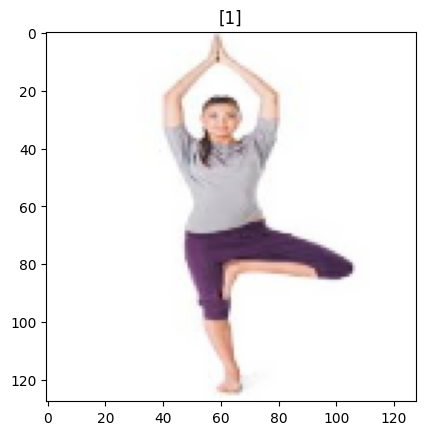

In [10]:
plt.imshow(X[305])
plt.title([Y[305]])
plt.show()

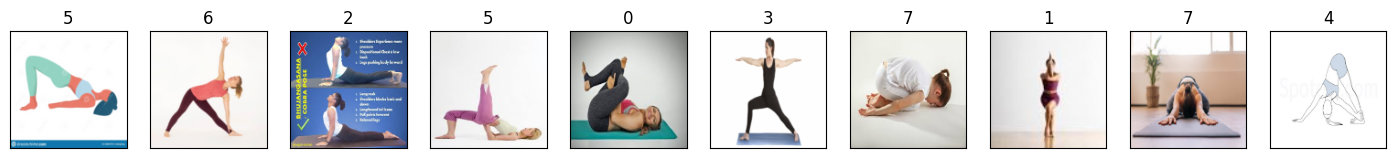

In [11]:
from random import randint
import matplotlib.pyplot as plt

def yogaplot(n,sizeofpic):
  n = 50  # how many digits we will display
  plt.figure(figsize=(sizeofpic))
  for i in range(10, 20):
    # Display original images
    rn = randint(0, len(X) - 1)  # Generating a random index within the range of available images
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(Y[rn])  # Assuming Y contains the names of yoga poses
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()
  plt.close()
yogaplot(50,(90,40))

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

# OneHot-Encoding
from keras.utils import to_categorical

# Your code using to_categorical

Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

Y_train.shape,Y_test.shape

Shapes of Data Split into Train & Test Part
Training Data->(1714, 128, 128, 3),(1714,) Testing Data->((429, 128, 128, 3), (429,))


((1714, 9), (429, 9))

In [13]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

# Load the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Loss: %.2f" % scores[0])
print("Accuracy: %.2f%%" % (scores[1]*100))


17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/10
54/54 [==============================] - 113s 2s/step - loss: 1.3647 - accuracy: 0.5828 - val_loss: 1.6475 - val_accuracy: 0.5431
Epoch 2/10
54/54 [==============================] - 104s 2s/step - loss: 0.6831 - accuracy: 0.7859 - val_loss: 1.4603 - val_accuracy: 0.6480
Epoch 3/10
54/54 [==============================] - 103s 2s/step - loss: 0.5912 - accuracy: 0.8250 - val_loss: 1.8018 - val_accuracy: 0.6527
Epoch 4/10
54/54 [==============================] - 104s 2s/step - loss: 0.4840 - accuracy: 0.8676 - val_loss: 1.0851 - val_accuracy: 0.7203
Epoch 5/10
54/54 [==============================] - 115s 2s/step - loss: 0.4017 - accuracy: 0.8810 - val_loss: 0.9648 - val_accuracy: 0.7506
Epoch 6/10
54/54 [==============================] - 103s 2s/step - loss: 0.3249 - accuracy: 0.8979 - val_loss: 0.8907 - val_accuracy: 0.7786
Epoch 7/10
54/54 [==============================] - 104s 2s/step - loss: 0.3751 - accurac

Text(0.5, 1.0, 'Loss evolution')

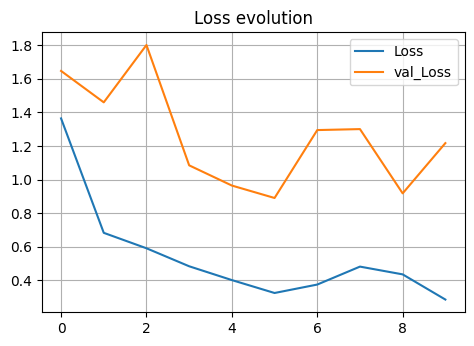

In [14]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

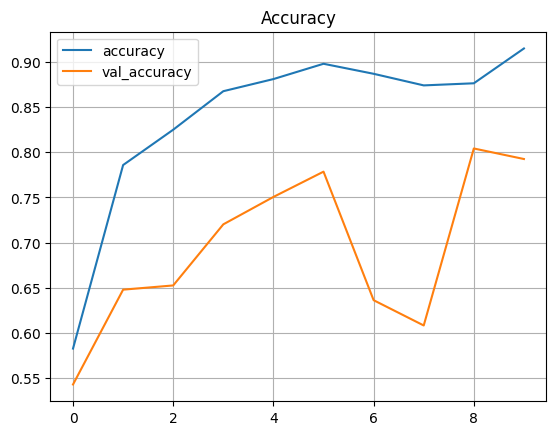

In [15]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [16]:
score=model.evaluate(X_test,Y_test,verbose=1)

14/14 [==============================] - 7s 486ms/step - loss: 1.2175 - accuracy: 0.7925


In [17]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

14/14 [==============================] - 5s 280ms/step
[5 2 5 5 3 8 7 2 8 3 7 7 3 0 8 7 7 7 2 5 4 7 5 2 1 0 3 6 1 3 6 2 7 7 3 5 7
 6 5 7 7 3 6 3 5 1 3 8 5 4 3 4 8 6 1 6 4 4 7 1 7 4 6 5 4 5 2 3 5 5 1 4 7 4
 7 0 4 1 6 0 5 1 8 7 0 1 7 1 4 6 7 7 2 4 2 1 1 4 5 3 5 7 3 8 7 3 4 8 1 6 5
 8 5 4 1 1 7 7 4 7 7 8 5 3 1 2 5 4 7 7 6 8 2 1 0 8 7 0 6 3 7 4 4 3 4 0 2 7
 7 7 6 0 6 6 8 3 1 8 1 5 2 0 7 7 1 6 1 7 0 2 8 1 0 2 4 5 7 7 0 5 1 7 2 1 6
 6 7 2 7 1 4 0 2 1 7 8 1 7 6 6 7 7 1 0 0 0 6 6 5 1 1 6 7 4 8 4 7 2 4 0 5 2
 1 1 3 8 5 7 2 5 2 0 3 8 4 7 2 7 1 3 7 6 7 7 3 6 7 7 1 7 1 7 7 8 1 3 2 6 2
 4 1 1 3 3 6 3 1 1 5 3 3 1 7 2 7 8 4 0 7 5 1 6 3 6 7 6 1 1 7 8 8 0 6 6 7 6
 7 7 6 3 3 3 8 0 2 8 3 7 0 0 4 1 4 4 7 7 4 4 1 3 7 7 0 8 7 1 1 1 5 4 2 2 7
 4 7 6 3 8 8 8 1 1 1 2 0 4 6 7 1 6 3 0 5 7 1 7 3 0 3 1 7 0 3 5 4 6 6 7 7 8
 0 2 4 1 0 7 1 7 8 4 1 1 0 2 7 7 5 5 1 6 8 5 5 8 0 4 7 7 6 3 8 0 7 6 8 7 7
 0 1 1 3 5 4 7 1 1 6 1 5 7 1 8 5 6 5 7 7 6 7]


In [18]:
Y_test=np.argmax(Y_test,axis=1)

In [19]:
print(Y_test)

[5 2 5 5 3 8 5 2 8 6 4 7 3 2 8 5 7 0 2 5 4 2 5 2 1 0 3 6 1 3 6 6 7 0 0 5 0
 6 5 5 0 3 6 3 5 1 3 8 5 4 3 4 8 6 2 6 4 4 7 1 0 4 6 5 4 5 2 3 5 5 1 4 4 4
 7 0 4 1 6 2 5 1 8 0 7 1 7 1 4 6 1 7 3 4 2 1 1 4 5 7 5 7 3 8 7 3 4 2 0 6 5
 8 5 4 1 1 0 5 6 0 7 8 5 3 1 2 5 4 7 7 6 8 2 8 0 8 7 2 6 3 7 4 4 1 4 0 2 2
 7 6 6 2 6 6 8 6 1 8 1 5 1 0 7 2 1 6 1 4 0 2 8 1 0 3 4 5 5 5 2 5 8 7 2 8 6
 6 5 7 7 8 4 0 0 8 7 8 1 7 6 1 7 5 1 0 0 0 6 6 5 1 1 6 5 4 8 4 2 2 4 0 5 2
 1 1 3 8 5 7 2 5 2 0 3 8 4 7 1 7 8 3 1 6 7 7 3 6 7 7 3 7 1 5 7 8 1 3 2 6 2
 4 1 1 3 3 6 3 1 1 5 3 3 1 7 2 7 8 4 0 6 5 1 6 3 6 0 6 6 8 7 8 8 0 6 6 7 6
 7 7 6 3 3 3 1 0 2 8 3 5 0 0 4 1 4 4 7 2 5 4 1 3 7 7 0 8 0 1 1 1 5 4 2 2 4
 4 1 6 3 8 8 8 1 1 1 3 2 4 6 7 6 6 3 0 5 5 1 1 3 0 3 1 4 0 3 5 4 6 6 4 7 8
 0 2 4 1 0 5 1 6 8 4 1 1 0 2 7 6 5 0 6 6 8 5 5 8 0 4 7 7 6 3 3 2 0 6 8 7 7
 2 1 1 3 5 4 7 1 3 6 2 5 5 1 8 5 6 5 0 7 6 7]


In [20]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,y_pred))

[[26  1  1  1  0  1  0 12  0]
 [ 0 51  2  1  0  0  1  4  1]
 [ 8  2 23  0  0  0  0  5  1]
 [ 0  2  3 36  0  0  0  0  1]
 [ 0  0  0  0 39  0  0  6  0]
 [ 0  0  0  0  1 39  0 14  0]
 [ 0  3  1  2  1  0 44  4  0]
 [ 1  0  1  1  0  0  0 49  0]
 [ 0  7  0  0  0  0  0  0 33]]


In [21]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68        42
           1       0.77      0.85      0.81        60
           2       0.74      0.59      0.66        39
           3       0.88      0.86      0.87        42
           4       0.95      0.87      0.91        45
           5       0.97      0.72      0.83        54
           6       0.98      0.80      0.88        55
           7       0.52      0.94      0.67        52
           8       0.92      0.82      0.87        40

    accuracy                           0.79       429
   macro avg       0.83      0.79      0.80       429
weighted avg       0.83      0.79      0.80       429



14/14 [==============================] - 8s 558ms/step


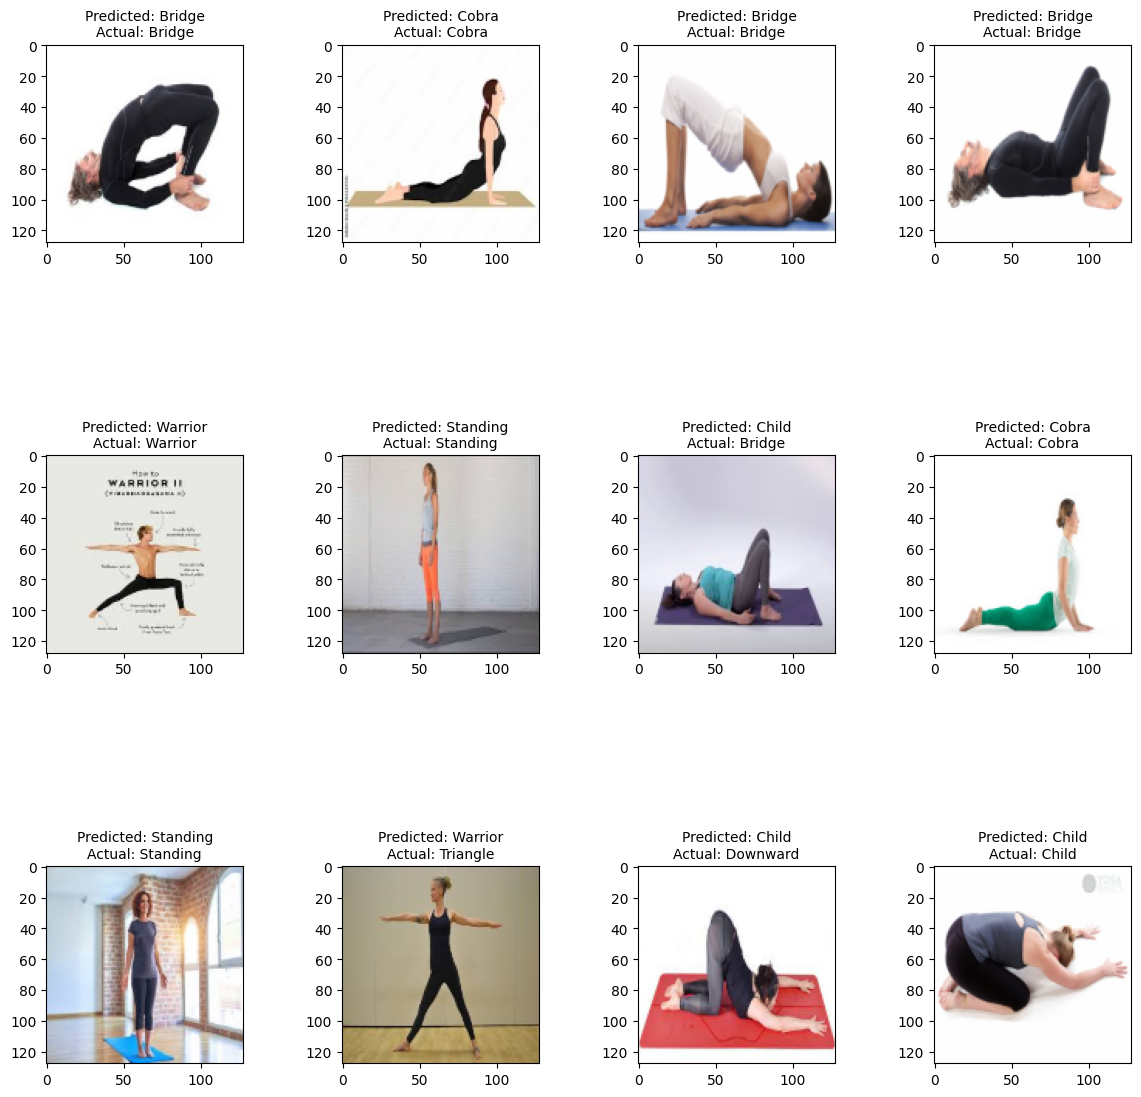

In [22]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, 1)
Y_classes = Y_test

L = 3
W = 4
fig, axes = plt.subplots(L, W, figsize=(14, 14))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted: {labels[predicted_classes[i]]}\nActual: {labels[Y_classes[i]]}", fontsize=10)
    axes[i].axis('on')

plt.subplots_adjust(wspace=0.5, hspace=0.6)
plt.show()